<a href="https://colab.research.google.com/github/Arinjay11000/Minor-Projects/blob/main/Spam%20Classifier/Spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
cols=["Label","Message"]
df.columns=cols
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


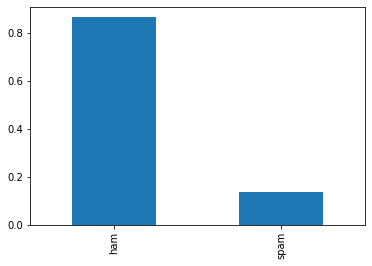

In [ ]:
df["Label"].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [ ]:
df[df["Label"]=="spam"].shape

(747, 2)

In [ ]:
ps=PorterStemmer()
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]', ' ', df["Message"][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
  review=" ".join(review)
  df["Message"][i]=review
df.head()

,Label,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [ ]:
cv = TfidfVectorizer(max_features=3000)
X = cv.fit_transform(df["Message"]).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(5572, 3000)

In [ ]:
Y=pd.get_dummies(df["Label"])
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ham     5572 non-null   uint8
 1   spam    5572 non-null   uint8
dtypes: uint8(2)
memory usage: 11.0 KB


In [ ]:
Y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
Y=Y.iloc[:,1]
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: spam, dtype: uint8

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10,stratify=Y)
sm=SMOTE(random_state=0)
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
print(sum(Y_train_res==1))
print(sum(Y_train_res==0))

3859
3859


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.92      0.93       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


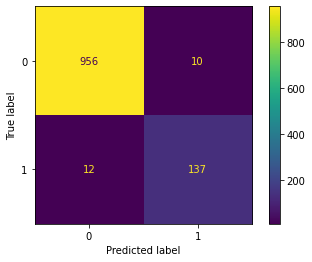

In [ ]:
model1=LogisticRegression()
model1.fit(X_train_res,Y_train_res)
Y_pred1=model1.predict(X_test)
print(classification_report(Y_test,Y_pred1))
plot_confusion_matrix(model1,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.74      0.84       149

    accuracy                           0.96      1115
   macro avg       0.96      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


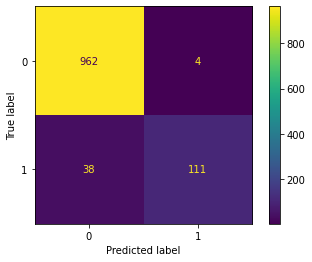

In [ ]:
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train_res,Y_train_res)
Y_pred2=model2.predict(X_test)
print(classification_report(Y_test,Y_pred2))
plot_confusion_matrix(model2,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.85      0.88      0.86       149

    accuracy                           0.96      1115
   macro avg       0.92      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


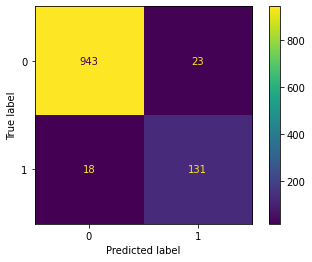

In [ ]:
model3=DecisionTreeClassifier()
model3.fit(X_train_res,Y_train_res)
Y_pred3=model3.predict(X_test)
print(classification_report(Y_test,Y_pred3))
plot_confusion_matrix(model3,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


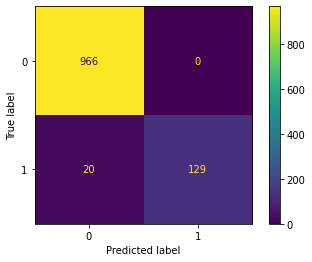

In [ ]:
model4=RandomForestClassifier()
model4.fit(X_train_res,Y_train_res)
Y_pred4=model4.predict(X_test)
print(classification_report(Y_test,Y_pred4))
plot_confusion_matrix(model4,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       966
           1       0.49      0.87      0.63       149

    accuracy                           0.86      1115
   macro avg       0.73      0.87      0.77      1115
weighted avg       0.91      0.86      0.88      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


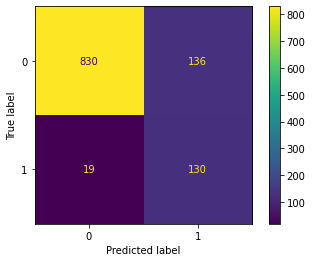

In [ ]:
model5=GaussianNB()
model5.fit(X_train_res,Y_train_res)
Y_pred5=model5.predict(X_test)
print(classification_report(Y_test,Y_pred5))
plot_confusion_matrix(model5,X_test,Y_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       966
           1       0.81      0.97      0.88       149

    accuracy                           0.97      1115
   macro avg       0.90      0.97      0.93      1115
weighted avg       0.97      0.97      0.97      1115



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


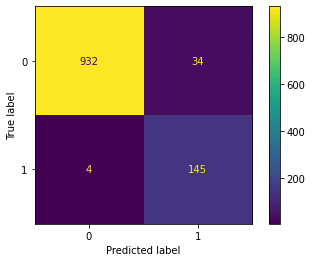

In [ ]:
model6=MultinomialNB()
model6.fit(X_train_res,Y_train_res)
Y_pred6=model6.predict(X_test)
print(classification_report(Y_test,Y_pred6))
plot_confusion_matrix(model6,X_test,Y_test)